# Introduce Graphing w/ Notebooks

In [1]:
%matplotlib inline
# Important for using matplotlib w/ Ipython Notebook
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import graphviz as gv

import random
import numpy as np

import sys
import os

from __future__ import division

In [2]:
def GraphIt(V, E, w={}, D=True, C={}):
    'Plots a graph'
    G = gv.Digraph(filename='graph', format='png') if D else gv.Graph(filename='graph', format='png')
        
    for v in V:
        G.node(str(v))
    for u in E:
        for v in E.get(u, []):
            if not D and u>v: continue
            if (u,v) in C or ((v,u) in C and not D):
                G.edge(str(u),str(v), label = str(w.get((u,v), '')), color='blue')
            else:
                G.edge(str(u),str(v), label = str(w.get((u,v), '')))
    G.render()
    img=mpimg.imread('graph.png')

    fig, ax = plt.subplots(frameon=False)
    fig.set_size_inches(7,7)
    imgplot = plt.imshow(img)

    ax.axis('off')
    plt.box(on=None) 
    plt.show()  
    print "Vertex: Edge List"
    for u in V:
        print u, ": ", E.get(u, [])

In [3]:
def RandomEdgePermute(N, p, selfE=False, D=True):
    V = range(1,N+1)
    Elist = [(u,v) for u in range(1,N+1) for v in range(1,N+1) if (u!=v or selfE) and (u<v or D)]
    random.shuffle(Elist)
    E = {}
    for i in range(int(p*len(Elist))):
        u, v = Elist[i]
        e = E.get(u,[])
        e.append(v)
        e.sort()
        E[u] = e
        if not D:
            e = E.get(v,[])
            e.append(u)
            e.sort()
            E[v] = e
    return V, E

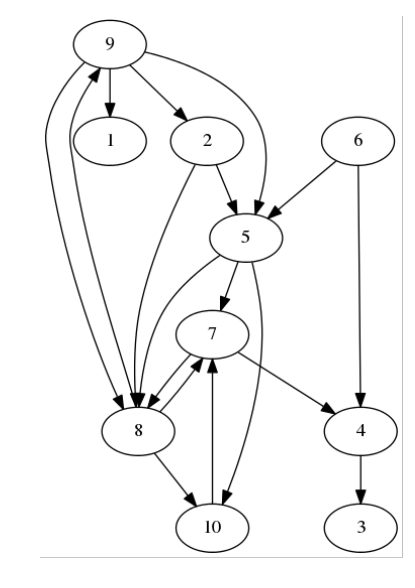

Vertex: Edge List
1 :  []
2 :  [5, 8]
3 :  []
4 :  [3]
5 :  [7, 8, 10]
6 :  [4, 5]
7 :  [4, 8]
8 :  [7, 9, 10]
9 :  [1, 2, 5, 8]
10 :  [7]


In [4]:
V, E = RandomEdgePermute(10, 0.2)
GraphIt(V, E)

In [5]:
def WriteGraph(V,E, filename):
    f = open(filename, 'w')
    for u in E:
        for v in E.get(u, []):
            f.write(str(u) + " " + str(v) + os.linesep)
    f.close()

def ReadGraph(N, filename):
    V = range(1,N+1)
    E = {}
    f = open(filename)
    for line in f:
        l = [int(i) for i in line.strip().split(" ")]
        e = E.get(l[0],[])
        e.append(l[1])
        e.sort()
        E[l[0]] = e
    return V, E

In [6]:
gf = "graph4.txt"
WriteGraph(V, E, gf)
with open(gf) as f:
    print f.read()


2 5
2 8
4 3
5 7
5 8
5 10
6 4
6 5
7 4
7 8
8 7
8 9
8 10
9 1
9 2
9 5
9 8
10 7



{1: [9, 10], 2: [5, 6], 3: [4, 5], 4: [5, 8, 9], 5: [1], 6: [10], 7: [9], 8: [1, 2], 9: [7], 10: [3, 5, 7]}


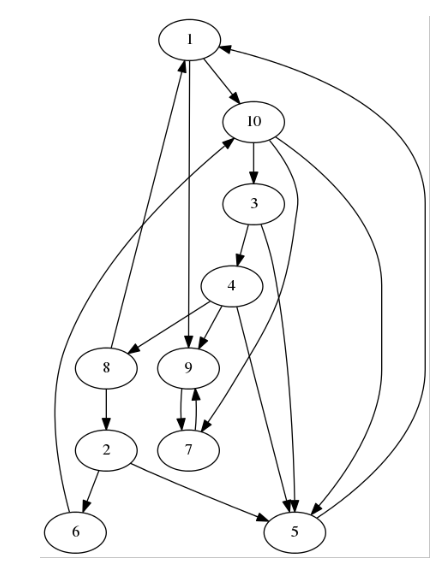

Vertex: Edge List
1 :  [9, 10]
2 :  [5, 6]
3 :  [4, 5]
4 :  [5, 8, 9]
5 :  [1]
6 :  [10]
7 :  [9]
8 :  [1, 2]
9 :  [7]
10 :  [3, 5, 7]


In [7]:
gf = "graph1.txt"
V, E = ReadGraph(10, gf)
print E
GraphIt(V, E)

In [8]:
from graphs import *

In [9]:
c, d, p = BFS(V, E, 1)
print "Vertex: Distance [Path]"
for u in d:
    print u,": ", d[u], Path(p, u)

Vertex: Distance [Path]
1 :  0 [1]
2 :  5 [1, 10, 3, 4, 8, 2]
3 :  2 [1, 10, 3]
4 :  3 [1, 10, 3, 4]
5 :  2 [1, 10, 5]
6 :  6 [1, 10, 3, 4, 8, 2, 6]
7 :  2 [1, 9, 7]
8 :  4 [1, 10, 3, 4, 8]
9 :  1 [1, 9]
10 :  1 [1, 10]


In [10]:
DFS(V,E)

for u in DISCOVER:
    print 'Discover/Finish: ', u, ':', DISCOVER[u], FINISH[u]
    
tree = [(u,v) for (u,v) in ETYPE if ETYPE[(u,v)]=='Tree']
back = [(u,v) for (u,v) in ETYPE if ETYPE[(u,v)]=='Back']
forward = [(u,v) for (u,v) in ETYPE if ETYPE[(u,v)]=='Forward']
cross = [(u,v) for (u,v) in ETYPE if ETYPE[(u,v)]=='Cross']

tree.sort()
back.sort()
forward.sort()
cross.sort()
print 'Tree: ', tree
print 'Back: ', back
print 'Forward: ', forward
print 'Cross: ', cross
print "Vertices in Topological Order: ",   [x[1] for x in sorted([(FINISH[u],u) for u in FINISH],
                                                                 reverse=True, key=lambda x: x[0])]


Discover/Finish:  1 : 1 20
Discover/Finish:  2 : 12 15
Discover/Finish:  3 : 7 18
Discover/Finish:  4 : 8 17
Discover/Finish:  5 : 9 10
Discover/Finish:  6 : 13 14
Discover/Finish:  7 : 3 4
Discover/Finish:  8 : 11 16
Discover/Finish:  9 : 2 5
Discover/Finish:  10 : 6 19
Tree:  [(1, 9), (1, 10), (2, 6), (3, 4), (4, 5), (4, 8), (8, 2), (9, 7), (10, 3)]
Back:  [(5, 1), (6, 10), (7, 9), (8, 1)]
Forward:  [(3, 5), (10, 5)]
Cross:  [(2, 5), (4, 9), (10, 7)]
Vertices in Topological Order:  [1, 10, 3, 4, 8, 2, 6, 5, 9, 7]
